<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/KNN/KNN_Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Spam classification using KNN algorithm.

**Context:**

 Email classification dataset, where each row is an email and every column contains a word that has been found in the emails with values indicating how many words are there.

**Objective:**

To Create a model to classify emails as spam or not spam using KNN.

**Data Description:**

Number of Rows: 5172 (each row represents an email)

Number of Columns: 3002 (1 column for email name, 3000 columns for words, 1 column for labels)

First Column: Email name (encoded with numbers for privacy)

Last Column: Labels for prediction (1 for spam, 0 for not spam)

Remaining Columns: 3000 most common words in the emails (after excluding non-alphabetical characters/words)

#Importing all necessary Libraries

In [1]:
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

#To check the performance of the model
from sklearn import metrics

#Loading the dataset

In [10]:
df=pd.read_csv('/content/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#checking the info for data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


**Observations:**
* We can observe that int64(3001) indicates there are 3001 columns that have the data type int 64

* Object(1) indicates there is one column with object data type.

**Checking for null values**


In [12]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


**Observation:**

There are no null values in the data set.

#Summary statistics

In [13]:
#Summary statistics
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [14]:
df['Prediction'].nunique()

2

In [15]:
df['Prediction'].value_counts()

,count
Prediction,
0,3672
1,1500


**Observations:**

* not_Spam_emails : 3672

* spam_emails : 1500

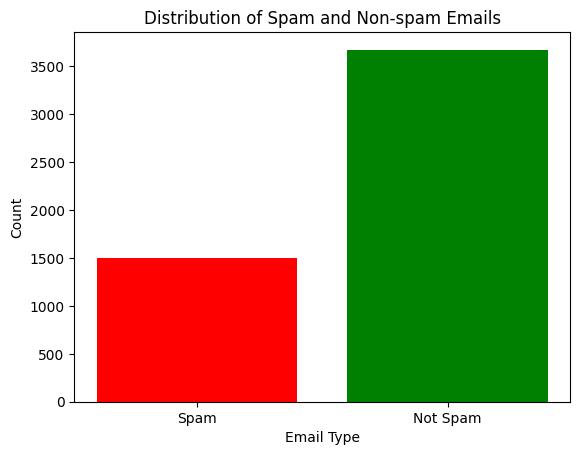

In [16]:
# Count the occurrences of each value in the 'Prediction' column
spam_count = df['Prediction'].value_counts()[1]
non_spam_count = df['Prediction'].value_counts()[0]

# Create a bar plot
plt.bar(['Spam', 'Not Spam'], [spam_count, non_spam_count], color=['red', 'green'])

# Add labels and title
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-spam Emails')

# Display the plot
plt.show()

**Observation:**
The above plot indicates that not spam emails are more than spam emails.

#Data Preprocessing

In [17]:
df = df.iloc[:, 1:]

#Model Building

Separating the independent variables (X) and the dependent variable (Y)

In [18]:
X=df.drop('Prediction',axis=1)
y=df['Prediction']

Splitting the data into train and test

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X.shape,y.shape

((5172, 3000), (5172,))

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

#Building KNN model.

In [33]:
#Searching for optimal values of K
from sklearn.model_selection import cross_val_score
#list the scores from k_range
k_range=range(1,15)
k_scores=[]

#Looping through the values
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X_train,y_train,cv=5,scoring ='accuracy')
  k_scores.append(scores.mean())

In [34]:
#Printing the scores
print(k_scores)

[np.float64(0.8610062562430997), np.float64(0.8730955259975814), np.float64(0.8614913925544281), np.float64(0.8781703263644276), np.float64(0.8624599127280375), np.float64(0.870438813241505), np.float64(0.8643925719526372), np.float64(0.8656035142444901), np.float64(0.8598020316725957), np.float64(0.8641527785079649), np.float64(0.8631851345588795), np.float64(0.8629450490393659), np.float64(0.86560351424449), np.float64(0.8619774050902803)]


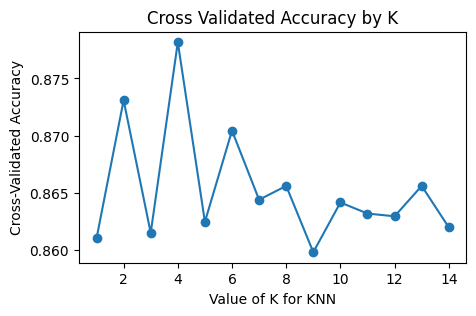

In [35]:
#plotting the value of k for KNN
plt.figure(figsize=(5,3))
plt.plot(k_range, k_scores, marker= 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validated Accuracy by K')
plt.show()

In [25]:
#Optimum model
knn=KNeighborsClassifier(n_neighbors=4)

#Fitting the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
#Taking predictions from the model
y_train_pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

#Checking the performance of the model

In [29]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 0.93
Training Precision : 0.93
Training Recall : 0.93
Training F1 Score : 0.93

Testing Accuracy : 0.87
Testing Precision : 0.87
Testing Recall : 0.87
Testing F1 Score : 0.87


#Conclusion

**Observations:**

The model is performing well on both training and testing data.